<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/Support_Vector_Machine/SVM_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [51]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

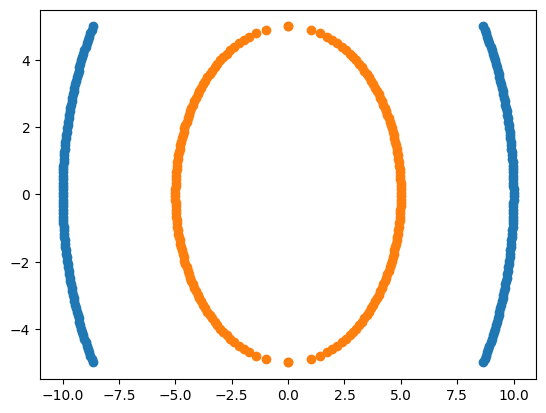

In [52]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [53]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['x1', 'x2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['x1', 'x2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.tail()

,x1,x2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [54]:
# independent and dependent features
X = df.iloc[:, :2].values
Y = df.Y

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

Polynomial Kernel

In [56]:
# we need to find components for the polynomial kernel
# x1, x2, x1_square, x2_square, x1*x2

df['x1_square'] = df['x1']**2
df['x2_square'] = df['x2']**2
df['x1 * x2'] = (df['x1'] * df['x2'])
df.head()

,x1,x2,Y,x1_square,x2_square,x1 * x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
import plotly.express as px

fig = px.scatter_3d(df, x = 'x1', y = 'x2', z = 'x1 * x2', color='Y')

fig.show()

In [59]:
fig = px.scatter_3d(df, x='x1_square', y='x2_square', z='x1 * x2', color='Y')

fig.show()

In [60]:
x = df[['x1_square', 'x2_square', 'x1 * x2']].values
y = df['Y'].values

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(x, y)

SVC(kernel='linear')

In [62]:
# get plane coefficients

w = classifier.coef_[0]
b = classifier.intercept_[0]

In [63]:
import numpy as np
import plotly.graph_objects as go

# create grid range
x_range = np.linspace(df['x1_square'].min(), df['x1_square'].max(), 10)
y_range = np.linspace(df['x2_square'].min(), df['x2_square'].max(), 10)

xx, yy = np.meshgrid(x_range, y_range)

# compute corresponding z = (-w1 * x -w2 * y -b)/w3

zz = (-w[0]*xx -w[1]*yy - b)/w[2]

In [64]:
# create plan as surface

plane = go.Surface(x=xx, y=yy, z=zz, colorscale='Blues', opacity=0.5)

# add to existing 3D plot

fig.add_trace(plane)

fig.show()